In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [3]:
evds=evdsAPI('dsIC3fiGlu')


In [4]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
usd

,Tarih,TP_DK_USD_S_YTL
0,2006-2,1.326535
1,2006-3,1.335139
2,2006-4,1.337345
3,2006-5,1.420659
4,2006-6,1.600536
...,...,...
206,2023-4,19.337032
207,2023-5,19.719514
208,2023-6,23.106042
209,2023-7,26.470338


In [5]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
205,2023-3,1269.75
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59


In [6]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
205,2023-3,1269.75
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59


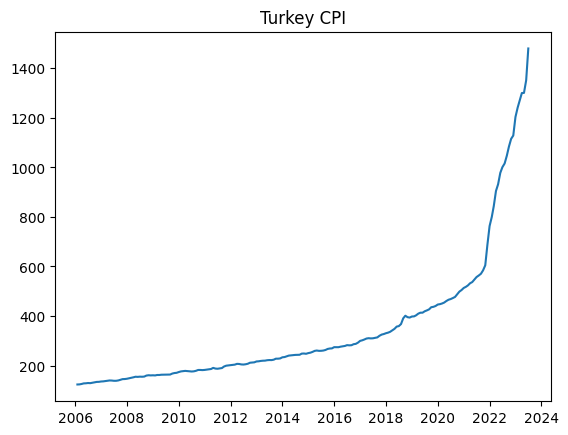

In [7]:
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [8]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
0,1.326535
1,1.335139
2,1.337345
3,1.420659
4,1.600536
...,...
206,19.337032
207,19.719514
208,23.106042
209,26.470338


In [9]:
dates= pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6

,USD/TL
2006-02-01,1.326535
2006-03-01,1.335139
2006-04-01,1.337345
2006-05-01,1.420659
2006-06-01,1.600536
...,...
2023-04-01,19.337032
2023-05-01,19.719514
2023-06-01,23.106042
2023-07-01,26.470338


In [10]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
206,2023-4,9.505999e+09
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147842e+10


In [11]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
206,2023-4,9.505999e+09
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147842e+10


In [12]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn



,Para Arzi
2006-02-01,2.423895
2006-03-01,2.494857
2006-04-01,2.521919
2006-05-01,2.751947
2006-06-01,2.791388
...,...
2023-04-01,95.059993
2023-05-01,94.093167
2023-06-01,108.345324
2023-07-01,114.784169


In [13]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,2006-2,59.78
1,2006-3,66.06
2,2006-4,72.15
3,2006-5,67.57
4,2006-6,73.20
...,...,...
205,2023-3,79.19
206,2023-4,81.32
207,2023-5,71.98
208,2023-6,74.51


In [14]:

brent1=pd.DataFrame(brent)
brent1.columns=["Tarih","Brent"]
brent1


,Tarih,Brent
0,2006-2,59.78
1,2006-3,66.06
2,2006-4,72.15
3,2006-5,67.57
4,2006-6,73.20
...,...,...
205,2023-3,79.19
206,2023-4,81.32
207,2023-5,71.98
208,2023-6,74.51


In [15]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_11476\234948979.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,59.78
2006-03-01,66.06
2006-04-01,72.15
2006-05-01,67.57
2006-06-01,73.20
...,...
2023-03-01,79.19
2023-04-01,81.32
2023-05-01,71.98


In [16]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
206,2023-4,8.572114e+09
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09


In [17]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
206,2023-4,85.721139
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952


In [18]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_11476\2513009782.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-04-01,85.721139
2023-05-01,88.043441
2023-06-01,95.646045


In [19]:
faiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
faiz

,Tarih,TP_KTFTUK
0,2006-2,17.2975
1,2006-3,17.0080
2,2006-4,16.2075
3,2006-5,16.3000
4,2006-6,19.6700
...,...,...
206,2023-4,29.2275
207,2023-5,32.0225
208,2023-6,38.5600
209,2023-7,45.8250


In [20]:

dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
faiz=pd.DataFrame(faiz)
faiz.columns=["Tarih","Faiz"]
faiz

,Tarih,Faiz
0,2006-2,17.2975
1,2006-3,17.0080
2,2006-4,16.2075
3,2006-5,16.3000
4,2006-6,19.6700
...,...,...
206,2023-4,29.2275
207,2023-5,32.0225
208,2023-6,38.5600
209,2023-7,45.8250


In [21]:
df4=pd.DataFrame()
df4["Faiz"]=faiz["Faiz"]
df4["TIME"]=dates
df4['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df4 = df4.set_index(['TIME'])
df4

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_11476\2598961303.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Faiz
TIME,
2006-02-01,17.2975
2006-03-01,17.0080
2006-04-01,16.2075
2006-05-01,16.3000
2006-06-01,19.6700
...,...
2023-04-01,29.2275
2023-05-01,32.0225
2023-06-01,38.5600


In [22]:
X=pd.concat([df6["USD/TL"].head(210),dfn["Para Arzi"].head(210),df14.Brent.head(210),df3.Kredi.head(210),df4["Faiz"].head(210)],axis=1)



In [23]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-03-01,1269.75
2023-04-01,1300.04
2023-05-01,1300.60
2023-06-01,1351.59


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5111.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          1.90e-157
Time:                        14:37:24   Log-Likelihood:                -652.62
No. Observations:                 147   AIC:                             1317.
Df Residuals:                     141   BIC:                             1335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.4250      9.481      9.010      0.0

In [64]:
results.params

const        85.424961
USD/TL        6.449405
Para Arzi     7.280553
Brent         0.264564
Kredi         3.992321
Faiz          0.043061
dtype: float64

In [27]:
from pmdarima.arima import auto_arima

results = auto_arima(df14, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1500.762, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1437.459, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1485.834, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1415.428, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1427.543, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1416.778, Time=0.47 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1416.902, Time=0.53 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1415.080, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1438.707, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=i

In [28]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df14.astype(float),
                                order=(0,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [30]:
pred_ci['Predicted'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
pred_ci['Observed'] = df14["Brent"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Brent,upper Brent,Predicted,Observed,"Diff, %%"
2022-10-01,72.994365,105.644835,89.319600,93.30,-4.266238
2022-11-01,76.811032,109.461502,93.136267,85.61,8.791341
2022-12-01,74.004597,106.655067,90.329832,82.82,9.067656
2023-01-01,69.416162,102.066632,85.741397,83.42,2.782783
2023-02-01,71.271100,103.921570,87.596335,83.21,5.271404
2023-03-01,54.086486,86.736956,70.411721,79.19,-11.085085
2023-04-01,65.519148,98.169618,81.844383,81.32,0.644839
2023-05-01,78.008644,110.659114,94.333879,71.98,31.055681
2023-06-01,58.127473,90.777943,74.452708,74.51,-0.076892
2023-07-01,55.790014,88.440484,72.115249,85.22,-15.377553


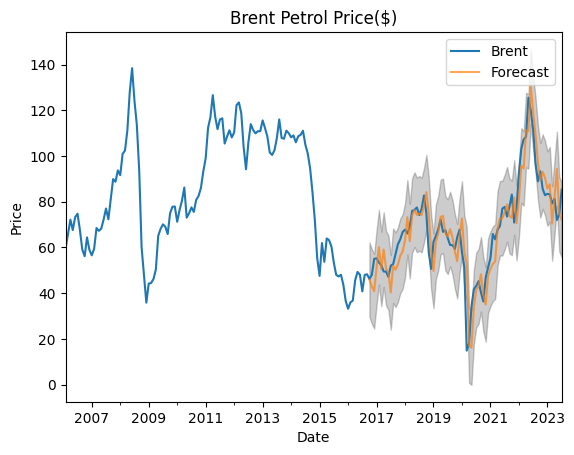

In [31]:
ax = df14['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")
plt.legend()
plt.show()

In [32]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

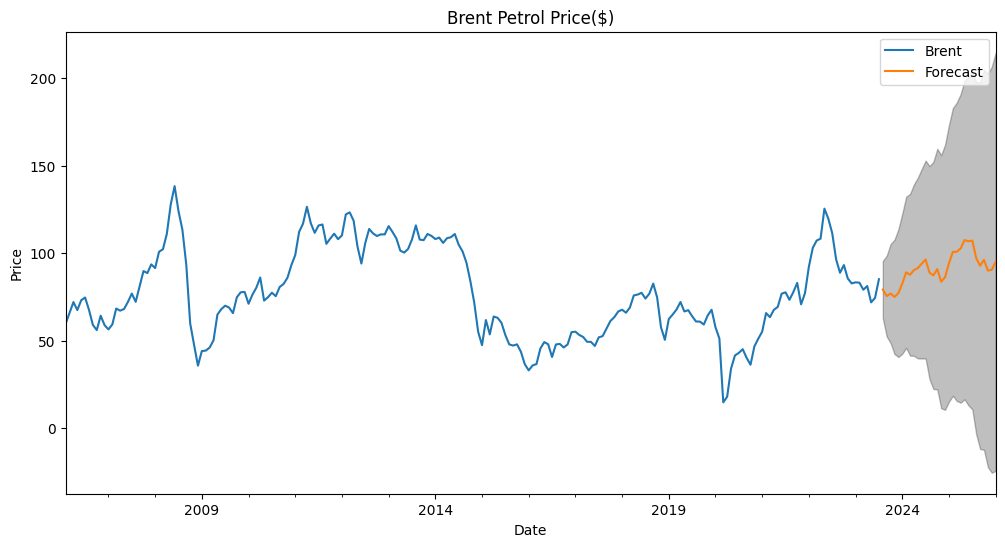

In [33]:
ax = df14.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")

plt.legend()

plt.show()

In [34]:
pred_ci['Mean'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
brenttahmin=pred_ci["Mean"]
brenttahmin[0]=88
brenttahmin

2023-08-01     88.000000
2023-09-01     75.562478
2023-10-01     76.998904
2023-11-01     75.125859
2023-12-01     77.256792
2024-01-01     82.638894
2024-02-01     89.159800
2024-03-01     87.751415
2024-04-01     90.416693
2024-05-01     91.598934
2024-06-01     94.059862
2024-07-01     96.448417
2024-08-01     88.984871
2024-09-01     87.384209
2024-10-01     90.994153
2024-11-01     83.790906
2024-12-01     86.354412
2025-01-01     94.282007
2025-02-01    100.786199
2025-03-01    100.884024
2025-04-01    102.815392
2025-05-01    107.542462
2025-06-01    106.903299
2025-07-01    107.242002
2025-08-01     97.302174
2025-09-01     92.893855
2025-10-01     96.282375
2025-11-01     90.172795
2025-12-01     90.600496
2026-01-01     95.136199
Freq: MS, Name: Mean, dtype: float64

In [35]:
from pmdarima.arima import auto_arima

results = auto_arima(dfn["Para Arzi"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=615.446, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=645.603, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.423, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=645.155, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=635.592, Time=0.41 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=616.879, Time=1.05 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=616.647, Time=1.89 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=618.578, Time=0.54 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.106, Time=0.15 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=616.190, Time=0.94 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=615.907, Time=0.98 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=646.069, Time=0.13 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=643.304, Time=0.26 sec
 ARIMA(2,1,0)(0,1,1)[12]             

In [36]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfn.astype(float),
                                order=(1,1,1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [38]:
pred_ci['Predicted'] = (pred_ci["lower Para Arzi"] + pred_ci["upper Para Arzi"])/2
pred_ci['Observed'] = dfn["Para Arzi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Para Arzi,upper Para Arzi,Predicted,Observed,"Diff, %%"
2022-11-01,79.588056,83.835835,81.711946,79.312824,3.024885
2022-12-01,80.508217,84.755859,82.632038,82.127970,0.613759
2023-01-01,83.105341,87.352848,85.229095,84.330974,1.064995
2023-02-01,85.482572,89.729947,87.606260,86.852197,0.868214
2023-03-01,88.932488,93.179828,91.056158,90.592762,0.511516
2023-04-01,92.445487,96.692696,94.569091,95.059993,-0.516412
2023-05-01,97.400707,101.647787,99.524247,94.093167,5.772024
2023-06-01,96.137093,100.384047,98.260570,108.345324,-9.307973
2023-07-01,110.982508,115.229338,113.105923,114.784169,-1.462089
2023-08-01,117.684132,121.930839,119.807486,116.280357,3.033297


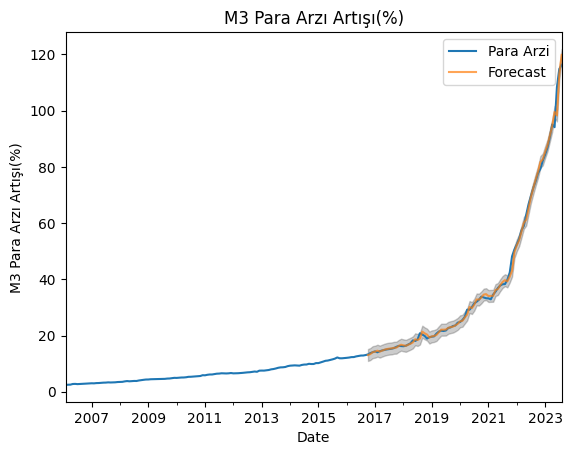

In [39]:
ax = dfn['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('M3 Para Arzı Artışı(%)')
plt.title("M3 Para Arzı Artışı(%)")
plt.legend()
plt.show()

In [40]:
# Get forecast in future
pred_uc = results.get_forecast(steps=29)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

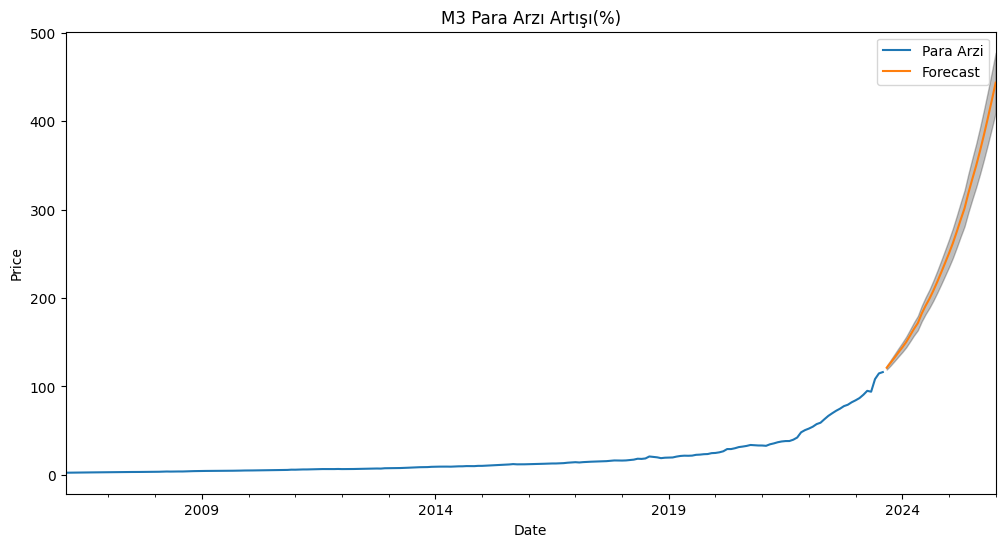

In [41]:
ax = dfn.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("M3 Para Arzı Artışı(%)")

plt.legend()

plt.show()

In [43]:
import random
pred_ci['Mean'] = (pred_ci["lower Para Arzi"] + pred_ci["upper Para Arzi"])/2
paraarzitahmin=pred_ci["Mean"]
paraarzitahmin=pd.concat([dfn["Para Arzi"].tail(1),paraarzitahmin])
paraarzitahmin=pd.DataFrame(paraarzitahmin)
paraarzitahmin.columns=["Para Arzi Tahmin"]
for i in range(1, len(paraarzitahmin)):
    drop_percentage = random.uniform(0.01,0.04)  # %1 ile %4 arasında rastgele bir artma yüzdesi seç
    paraarzitahmin.at[paraarzitahmin.index[i], 'Para Arzi Tahmin'] = paraarzitahmin.at[paraarzitahmin.index[i - 1], 'Para Arzi Tahmin'] * (1+drop_percentage)  # Değeri bir önceki aya göre artır

paraarzitahmin

,Para Arzi Tahmin
2023-08-01,116.280357
2023-09-01,117.773707
2023-10-01,122.015338
2023-11-01,124.226080
2023-12-01,127.311375
2024-01-01,132.197362
2024-02-01,137.449320
2024-03-01,141.810858
2024-04-01,146.861784
2024-05-01,149.516610


In [ ]:
from pmdarima.arima import auto_arima

results = auto_arima(df6, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=190.979, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=283.962, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=209.514, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=189.025, Time=0.57 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=242.784, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=187.038, Time=0.60 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=186.661, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=187.190, Time=0.64 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=188.794, Time=2.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=252.534, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=188.499, Time=0.32 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=188.514, Time=0.32 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=190.433, Time=0.74 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=185.573, Time=0.63 sec
 ARIMA(0,1,1)(0,1,0)[12] intercep

In [44]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df6.astype(float),
                                order=(0,1,1),
                                seasonal_order=(1,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [46]:
pred_ci['Predicted'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
pred_ci['Observed'] = df6["USD/TL"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower USD/TL,upper USD/TL,Predicted,Observed,"Diff, %%"
2022-11-01,18.249152,19.764780,19.006966,18.624382,2.054213
2022-12-01,18.098834,19.614463,18.856648,18.670545,0.996773
2023-01-01,17.569126,19.084754,18.326940,18.791373,-2.471522
2023-02-01,18.160539,19.676167,18.918353,18.857210,0.324242
2023-03-01,18.673824,20.189452,19.431638,19.003478,2.253060
2023-04-01,18.387361,19.902990,19.145175,19.337032,-0.992170
2023-05-01,19.062596,20.578225,19.820410,19.719514,0.511655
2023-06-01,19.354103,20.869732,20.111917,23.106042,-12.958189
2023-07-01,24.480462,25.996090,25.238276,26.470338,-4.654500
2023-08-01,26.622491,28.138120,27.380305,27.013350,1.358422


In [47]:
# Get forecast in future
pred_uc = results.get_forecast(steps=29)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

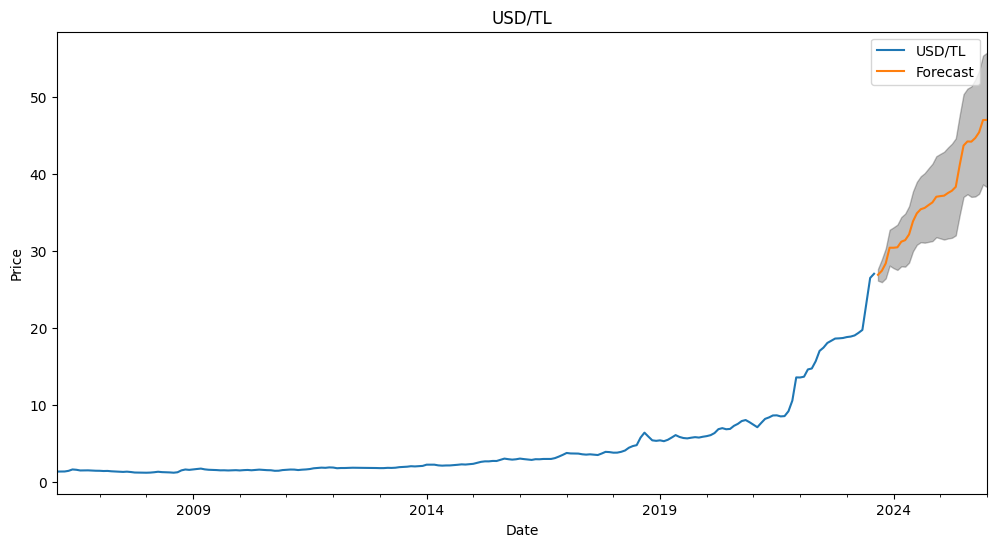

In [48]:
ax = df6.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("USD/TL")

plt.legend()

plt.show()

In [49]:
pred_ci['Mean'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
usdtahmin=pred_ci["Mean"]
usdtahmin=pd.concat([df6["USD/TL"].tail(1),usdtahmin])
usdtahmin

2023-08-01    27.013350
2023-09-01    26.877390
2023-10-01    27.400014
2023-11-01    28.358935
2023-12-01    30.396055
2024-01-01    30.390428
2024-02-01    30.448950
2024-03-01    31.175258
2024-04-01    31.380077
2024-05-01    32.124543
2024-06-01    33.817870
2024-07-01    34.862249
2024-08-01    35.391055
2024-09-01    35.561786
2024-10-01    35.928317
2024-11-01    36.278038
2024-12-01    37.014616
2025-01-01    37.091592
2025-02-01    37.154893
2025-03-01    37.502304
2025-04-01    37.791216
2025-05-01    38.299226
2025-06-01    41.098593
2025-07-01    43.658398
2025-08-01    44.196484
2025-09-01    44.166877
2025-10-01    44.635372
2025-11-01    45.383037
2025-12-01    46.969161
2026-01-01    46.992179
dtype: float64

In [ ]:
from pmdarima.arima import auto_arima

results = auto_arima(df3, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=437.234, Time=0.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=509.540, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=466.494, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=470.859, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=481.050, Time=0.13 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=438.459, Time=1.16 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=438.705, Time=2.30 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=441.108, Time=0.42 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=438.840, Time=3.20 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=463.632, Time=0.39 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=437.567, Time=1.56 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=436.033, Time=0.97 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=482.795, Time=0.19 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=437.622, Time=1.19 sec
 ARIMA(1,1,2)(0,1,2)[12]         

In [50]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df3.astype(float),
                                order=(3,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [52]:
pred_ci['Predicted'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
pred_ci['Observed'] = df3["Kredi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Kredi,upper Kredi,Predicted,Observed,"Diff, %%"
2022-11-01,68.417709,71.208867,69.813288,69.536996,0.397331
2022-12-01,69.701148,72.492305,71.096727,72.851339,-2.408483
2023-01-01,72.566079,75.357236,73.961657,75.079809,-1.489285
2023-02-01,75.535463,78.326620,76.931042,77.112692,-0.235565
2023-03-01,79.102668,81.893826,80.498247,82.109915,-1.962818
2023-04-01,83.942876,86.734034,85.338455,85.721139,-0.446428
2023-05-01,87.346462,90.137619,88.742041,88.043441,0.793472
2023-06-01,90.013857,92.805014,91.409436,95.646045,-4.429466
2023-07-01,97.536602,100.327759,98.932181,98.468952,0.470431
2023-08-01,98.814161,101.605318,100.209740,98.883947,1.340756


In [53]:
# Get forecast in future
pred_uc = results.get_forecast(steps=29)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

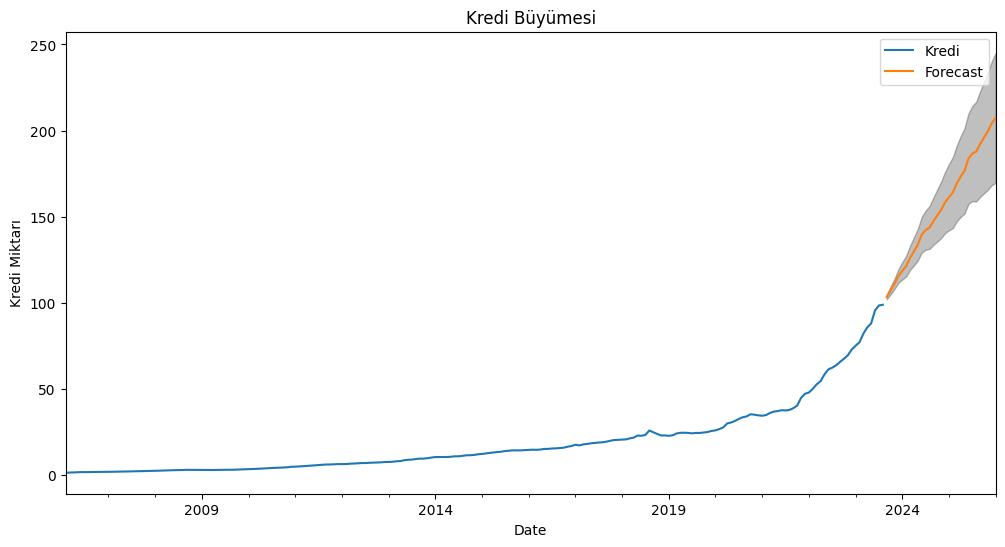

In [54]:
ax = df3.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Kredi Miktarı')
plt.title("Kredi Büyümesi")

plt.legend()

plt.show()

In [55]:
import random
pred_ci['Mean'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
kreditahmin=pred_ci["Mean"]
kreditahmin=pd.concat([df3["Kredi"].tail(1),kreditahmin])
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin.columns=["Kredi Tahmin"]
for i in range(1, len(kreditahmin)):
    drop_percentage = random.uniform(1.005, 1.01)  # %0.5 ile %1 arasında rastgele bir artış yüzdesi seç
    kreditahmin.at[kreditahmin.index[i], 'Kredi Tahmin'] = kreditahmin.at[kreditahmin.index[i - 1], 'Kredi Tahmin'] * (drop_percentage)  # Değeri bir önceki aya göre düşür


kreditahmin

,Kredi Tahmin
2023-08-01,98.883947
2023-09-01,99.655627
2023-10-01,100.566355
2023-11-01,101.326285
2023-12-01,101.872540
2024-01-01,102.478446
2024-02-01,103.463574
2024-03-01,104.091460
2024-04-01,104.968292
2024-05-01,105.617781


In [56]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df4.astype(float),
                                order=(2,1,0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [58]:
pred_ci['Predicted'] = (pred_ci["lower Faiz"] + pred_ci["upper Faiz"])/2
pred_ci['Observed'] = df4["Faiz"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Faiz,upper Faiz,Predicted,Observed,"Diff, %%"
2022-11-01,26.851230,32.114422,29.482826,29.6650,-0.614106
2022-12-01,26.957838,32.221030,29.589434,28.7180,3.034452
2023-01-01,25.209080,30.472272,27.840676,28.6800,-2.926514
2023-02-01,25.646298,30.909490,28.277894,28.2550,0.081025
2023-03-01,25.210939,30.474087,27.842513,26.5080,5.034378
2023-04-01,23.175552,28.438700,25.807126,29.2275,-11.702588
2023-05-01,28.833390,34.096537,31.464963,32.0225,-1.741078
2023-06-01,30.642771,35.905918,33.274345,38.5600,-13.707613
2023-07-01,39.605465,44.868612,42.237038,45.8250,-7.829703
2023-08-01,46.938225,52.201372,49.569798,45.5400,8.848920


In [59]:
# Get forecast in future
pred_uc = results.get_forecast(steps=29)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

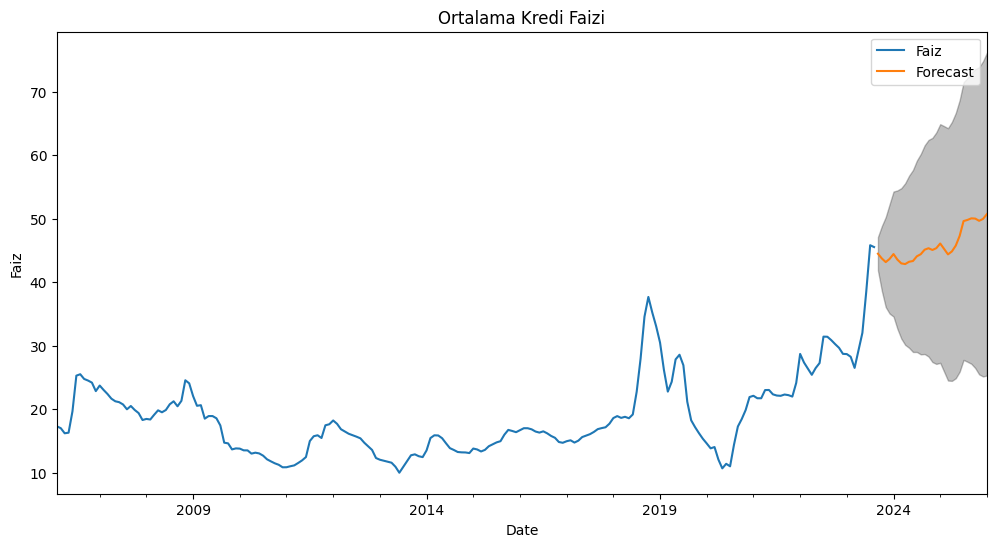

In [60]:
ax = df4.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Faiz')
plt.title("Ortalama Kredi Faizi")

plt.legend()

plt.show()

In [61]:
pred_ci['Mean'] = (pred_ci["lower Faiz"] + pred_ci["upper Faiz"])/2
faiztahmin=pred_ci["Mean"]
faiztahmin=pd.concat([df4["Faiz"].tail(1),faiztahmin])
faiztahmin

2023-08-01    45.540000
2023-09-01    44.491793
2023-10-01    43.740928
2023-11-01    43.173535
2023-12-01    43.676446
2024-01-01    44.438096
2024-02-01    43.558837
2024-03-01    42.967104
2024-04-01    42.861059
2024-05-01    43.221763
2024-06-01    43.344455
2024-07-01    44.083273
2024-08-01    44.414376
2024-09-01    45.123427
2024-10-01    45.354172
2024-11-01    45.080053
2024-12-01    45.363900
2025-01-01    46.100060
2025-02-01    45.248151
2025-03-01    44.386026
2025-04-01    44.849319
2025-05-01    45.769504
2025-06-01    47.298729
2025-07-01    49.631209
2025-08-01    49.809946
2025-09-01    50.060327
2025-10-01    50.022538
2025-11-01    49.674219
2025-12-01    49.969425
2026-01-01    50.729755
dtype: float64

In [66]:
res2=[]

for i in range(30):
    res2.append(results.params["const"]+results.params["USD/TL"]*usdtahmin[i]+results.params["Para Arzi"]*paraarzitahmin["Para Arzi Tahmin"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin[i]+results.params["Faiz"]*faiztahmin[i]
)


df9=pd.DataFrame()
dates=pd.date_range('2023-08-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)
df9["Inflation"]=res2
df9['TIME']=dates
df9=df9.set_index(dates)
del df9['TIME']
df9


#Hata alırsanız yorumu kaldırıp bu kodu çalıştırın:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#import pandas as pd
#import statsmodels.api as sm

#X_train_with_const = sm.add_constant(X_train)
#model_ols = sm.OLS(y_train, X_train_with_const)
#results = model_ols.fit()
#results.params

,Inflation
2023-08-01,1526.249364
2023-09-01,1535.990053
2023-10-01,1574.225696
2023-11-01,1599.019503
2023-12-01,1637.386614
2024-01-01,1676.798690
2024-02-01,1721.033565
2024-03-01,1759.580852
2024-04-01,1801.876513
2024-05-01,1828.927759


In [67]:
df=pd.concat([df["CPI"],df9["Inflation"]])
df=pd.DataFrame(df)
df.columns=["CPI"]
df

,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2025-09-01,2499.357199
2025-10-01,2566.656376
2025-11-01,2618.170681
2025-12-01,2684.661449


In [68]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
df['onceki_yil_tufe'] = df['CPI'].shift(12)

# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
df['yillik_enflasyon_orani'] = ((df['CPI'] / df['onceki_yil_tufe']) - 1) * 100

# NaN değerleri (ilk 12 ay) veriden çıkarın
df.dropna(inplace=True)

# Sonuçları başka bir DataFrame'e kopyalayın (gerekirse)
result_df = df[['yillik_enflasyon_orani']].copy()

result_df


,yillik_enflasyon_orani
2007-02-01,10.158269
2007-03-01,10.863263
2007-04-01,10.719962
2007-05-01,9.227769
2007-06-01,8.598305
...,...
2025-09-01,25.115815
2025-10-01,25.558902
2025-11-01,27.053283
2025-12-01,28.249480


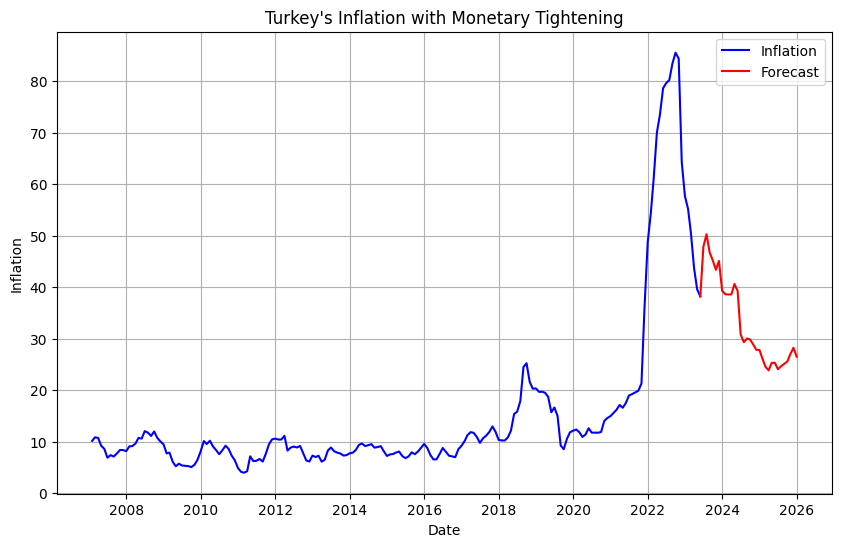

In [69]:
dates=pd.date_range('2008-02-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)





forecast=df.iloc[186:,1]

# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(df.iloc[:197]["yillik_enflasyon_orani"], label='Inflation', color='blue')
plt.plot(df.iloc[196:]["yillik_enflasyon_orani"],label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title("Turkey's Inflation with Monetary Tightening")
plt.legend()
plt.grid(True)
plt.show()
